In [1]:
#GaussianNB
#https://datascienceschool.net/view-notebook/c19b48e3c7b048668f2bb0a113bd25f7/

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [157]:
X_train = pd.read_csv('bi_5_X.csv', delimiter = ',')
Y_train = pd.read_csv('bi_5_Y.csv', delimiter = ',')

In [158]:
X_train.shape, Y_train.shape

((547192, 49), (547192, 2))

In [159]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [160]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [161]:
X_train.shape, Y_train.shape

((547192, 48), (547192,))

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.1, random_state=42)

In [163]:
model_norm = GaussianNB().fit(x_train, y_train)

In [164]:
y_pred = model_norm.predict_proba(x_test)

In [165]:
y_pred2=[]
for i in y_pred:
    y_pred2.append(np.argmax(i))

In [166]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))

Accuracy: 0.80


In [167]:
print(confusion_matrix(y_test, y_pred2)) 

[[29945     0]
 [10678 14097]]


In [168]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     29945
           1       1.00      0.57      0.73     24775

   micro avg       0.80      0.80      0.80     54720
   macro avg       0.87      0.78      0.79     54720
weighted avg       0.86      0.80      0.79     54720



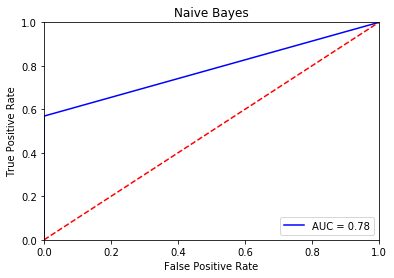

In [177]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
''' 여기에 사전 확률을 곱하면 사후 확률에 비례하는 값이 나온다. 아직 정규화 상수  p(x) 로 나누어주지 않았으므로 두 값의 합이 1이 아니다. 즉, 확률이라고 부를 수는 없다. 하지만 크기를 비교하면 y=0일 확률이 y=1일 확률보다 훨씬 크다는 것을 알 수 있다.'''
posterior = likelihood * model_norm.class_prior_
posterior
posterior / posterior.sum()